<a href="https://colab.research.google.com/github/avishank-dwivedi/Pytorch-Framework/blob/main/11cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, Dataset
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
torch.manual_seed(42)

In [ ]:
from google.colab import drive


# Mount Drive
drive.mount('/content/drive')

# Read the file (just adjust the path)
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/pytorch/fashion-mnist_train.csv')
df.head()

Mounted at /content/drive


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(60000, 785)

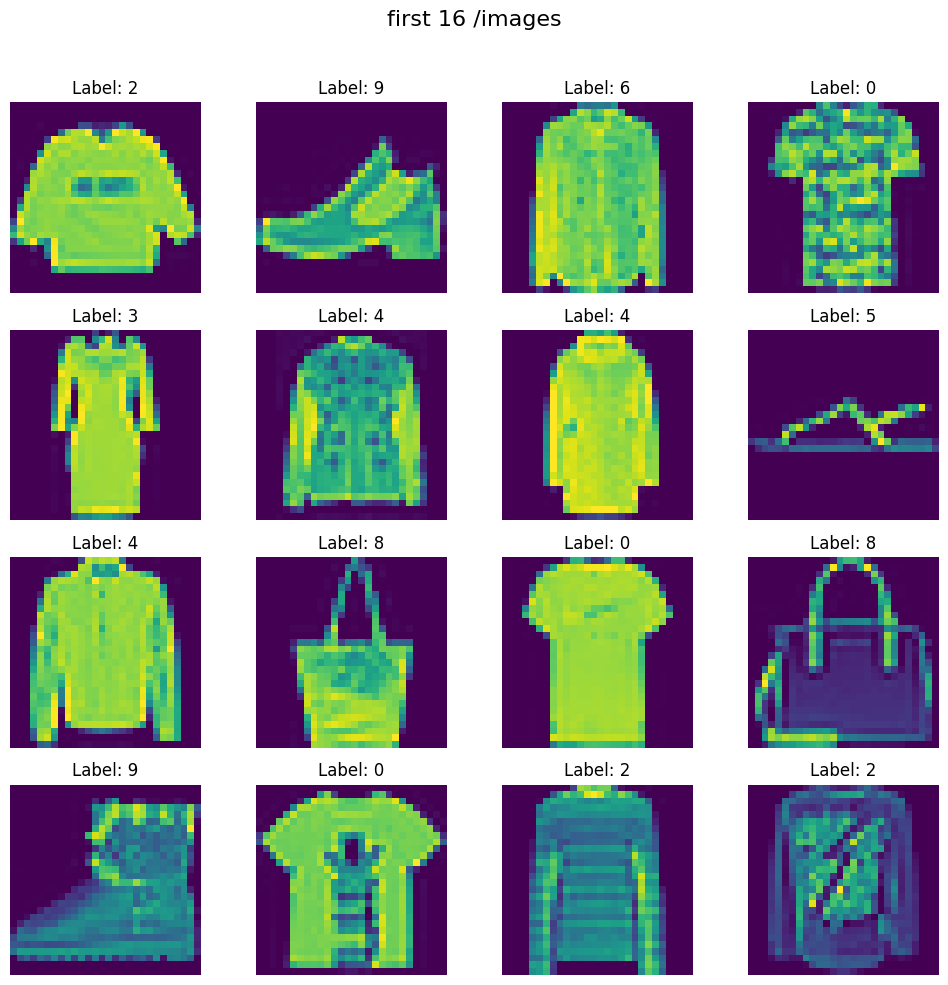

In [ ]:
#create a 4*4 grid of images
fig, axes = plt.subplots(4 , 4 , figsize=(10 , 10))
fig.suptitle("first 16 /images" , fontsize=16)

#plot the first 16 image from the dataset
for i , ax in enumerate(axes.flat):
    img = df.iloc[i , 1:].values.reshape(28 , 28) #Reshape to 28*28
    ax.imshow(img)# display in grayscale
    ax.axis('off') # Remove axis for a clear look
    ax.set_title(f"Label: {df.iloc[i , 0]}") #show the label

plt.tight_layout(rect = [0,0,1,0.96])
plt.show()

In [ ]:
# train test split
df = df.dropna()
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#scaling the feature
x_train = X_train / 255.0
x_test = X_test / 255.0

In [ ]:
#crete custom dataset class
class CustomDataset(Dataset):
  def __init__(self , features , labels):
    self.features =torch.tensor(features , dtype=torch.float32).reshape(-1,1,28,28)
    self.labels = torch.tensor(labels , dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self , idx):
    return self.features[idx] , self.labels[idx]

In [ ]:
#create train dataset object
train_dataset = CustomDataset(x_train , y_train)

In [ ]:
len(train_dataset)

48000

In [ ]:
#create test_dataset  object
test_dataset = CustomDataset(x_test , y_test)

In [ ]:
len(test_dataset)

12000

In [ ]:
  #create train and test loader
  train_loader = DataLoader(train_dataset , batch_size=32 , shuffle=True)
  test_loader = DataLoader(test_dataset , batch_size=32, shuffle=False)


In [ ]:
#define  NN class

class MyNN(nn.Module):
  def __init__(self , input_features):
    super().__init__()
    self.model = nn.Sequential(
        nn.Conv2d(input_features , 32 , kernel_size=3 ,  padding='same'),
        nn.ReLU(),
        nn.BatchNorm2d(32),
        nn.MaxPool2d(kernel_size=2 , stride=2 ),

        nn.Conv2d(32 , 64 , kernel_size=3 ,  padding='same'),
        nn.ReLU(),
        nn.BatchNorm2d(64),
        nn.MaxPool2d(kernel_size=2 , stride=2 )
    )

    self.classifier  = nn.Sequential(
        nn.Flatten(),
        nn.Linear(64*7*7 , 128),
        nn.ReLU(),
        nn.Dropout(p=0.4),
        nn.Linear(128 , 64),
        nn.ReLU(),
        nn.Dropout(p=0.4),
        nn.Linear(64 , 10)



    )



  def forward(self , x):
    x = self.model(x)
    x = self.classifier(x)

    return x

In [ ]:
learning_rate = 0.01
num_epochs = 100

In [ ]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

MyNN(
  (model): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (5): ReLU()
    (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3136, out_features=128, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU()
    (6): Dropout(p=0.4, inplace=False)
    (7): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [ ]:
#initialize the model
model = MyNN(1)
model = model.to(device)

#loss function
criterion = nn.CrossEntropyLoss()

#optimizer
optimizer = optim.SGD(model.parameters() , lr=learning_rate, weight_decay=1e-4)



In [ ]:
#training loop


for epoch in range(num_epochs):
  total_epoch_loss = 0
  for batch_features , batch_labels in train_loader:

    #move data on gpu

    batch_features , batch_labels = batch_features.to(device),batch_labels.to(device)

    #forward pass
    output = model(batch_features)

    #calculate loss
    loss = criterion(output , batch_labels)

    #backward pass
    optimizer.zero_grad()
    loss.backward()

    #update weights
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()
  avg_loss = total_epoch_loss/len(train_loader)
  print(f"Epoch {epoch+1}/{num_epochs} , Loss : {avg_loss}")

Epoch 1/100 , Loss : 0.6495122952858607
Epoch 2/100 , Loss : 0.3853309570203225
Epoch 3/100 , Loss : 0.3274308755248785
Epoch 4/100 , Loss : 0.29030216387907665
Epoch 5/100 , Loss : 0.2650147677063942
Epoch 6/100 , Loss : 0.2440155422737201
Epoch 7/100 , Loss : 0.22823898364106815
Epoch 8/100 , Loss : 0.21262603465716043
Epoch 9/100 , Loss : 0.20076766502857207
Epoch 10/100 , Loss : 0.19032157282903792
Epoch 11/100 , Loss : 0.17513428758302083
Epoch 12/100 , Loss : 0.1703332967373232
Epoch 13/100 , Loss : 0.15949847429183622
Epoch 14/100 , Loss : 0.14778381546338398
Epoch 15/100 , Loss : 0.14269363472859065
Epoch 16/100 , Loss : 0.13606288641411812
Epoch 17/100 , Loss : 0.12828709872222194
Epoch 18/100 , Loss : 0.11973193809064105
Epoch 19/100 , Loss : 0.11414700921376546
Epoch 20/100 , Loss : 0.11043600081776579
Epoch 21/100 , Loss : 0.10289166737875591
Epoch 22/100 , Loss : 0.10174861383872727
Epoch 23/100 , Loss : 0.09566592144748817
Epoch 24/100 , Loss : 0.0913070400710373
Epoch 25

In [ ]:
#set model to eval mode

model.eval()

MyNN(
  (model): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (5): ReLU()
    (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3136, out_features=128, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU()
    (6): Dropout(p=0.4, inplace=False)
    (7): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [ ]:
#evaluation code

total =0
correct = 0

with torch.no_grad():
  for batch_features , batch_labels in test_loader:

     #move data on gpu

    batch_features , batch_labels = batch_features.to(device),batch_labels.to(device)


    output = model(batch_features)

    _,predicted = torch.max(output.data , 1)

    total += batch_labels.shape[0]
    correct += (predicted == batch_labels).sum().item()
print(correct/total)

0.9248333333333333
